In [1]:
import matplotlib.pyplot as plt 
import pickle
import numpy as np
import os
import cv2
from sklearn.neighbors import KNeighborsClassifier


In [2]:
DATADIR = "./training_type"
LABELS = "abcdefghijklmnopqrstuvwxyz123456789"

subdirs = []
for subdir in os.listdir(DATADIR):
    subdirs.append(subdir)

    for file in os.listdir(DATADIR+"/"+subdir):
        image_path = os.path.join(DATADIR+"/"+subdir,file)
        image = cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)

In [3]:
training_data = []

def create_training_data():
    subdirs = []
    for subdir in os.listdir(DATADIR):
        subdirs.append(subdir)
        
        class_num = LABELS.index(subdir)
        for file in os.listdir(DATADIR+"/"+subdir):
            image_path = os.path.join(DATADIR+"/"+subdir,file)
            image_array = cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
            #print(image_array)
            training_data.append([image_array,class_num])
create_training_data()
print(training_data[0][0].shape)

(20, 20)


In [4]:
import random
random.shuffle(training_data)

In [5]:
X_train = []
y_train = []


for features,labels in training_data:
    #print(features)
    features = features.flatten()
    X_train.append(features)
    y_train.append(labels)

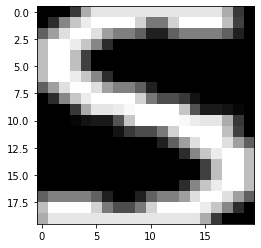

In [6]:
test_data = []
alpha_str = "abcdefghijklmnopqrstuvwxyz123456789"
def create_test_data():
    DATADIR = "./testing_type"

    LABELS = "NvidiasgraphicschipsarentusedjustforgamesanymoreSincethecompanymadeitschipsprogrammabletheyaretakingonfunctionsthatIntelmicroprocessorsdoAndmorethanevertheyarebeingusedforBigDatanumbercrunchingandsolvingproblemsthatpreviouslyhadtobedonebynongraphicssupercomputers".lower()
    sorted_files = []
    for file in sorted(os.listdir(DATADIR), key = lambda x: int(x[:x.index("_")])):
        sorted_files.append(file)
    count = 0
    for file in sorted_files[:len(LABELS)]:
        image_path = os.path.join(DATADIR,file)
        image = cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
        test_data.append([image,alpha_str.index(LABELS[count])])
        count+=1
    plt.imshow(image,cmap="gray")
    plt.show()
create_test_data()

In [7]:
X_test = []
y_test = []

In [8]:
for features,labels in test_data:
    features = features.flatten()
    X_test.append(features)
    y_test.append(labels)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
print(len(X_train))
for i in range(1,100):
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    print("i:",i," acc:",acc)

2745
i: 1  acc: 0.9619771863117871
i: 2  acc: 0.9809885931558935
i: 3  acc: 0.9809885931558935
i: 4  acc: 0.9809885931558935
i: 5  acc: 0.9809885931558935
i: 6  acc: 0.9809885931558935
i: 7  acc: 0.9809885931558935
i: 8  acc: 0.9467680608365019
i: 9  acc: 0.9809885931558935
i: 10  acc: 0.9467680608365019
i: 11  acc: 0.9809885931558935
i: 12  acc: 0.9391634980988594
i: 13  acc: 0.9809885931558935
i: 14  acc: 0.9809885931558935
i: 15  acc: 0.9809885931558935
i: 16  acc: 0.9809885931558935
i: 17  acc: 0.9809885931558935
i: 18  acc: 0.9809885931558935
i: 19  acc: 0.9809885931558935
i: 20  acc: 0.9391634980988594
i: 21  acc: 0.9391634980988594
i: 22  acc: 0.9391634980988594
i: 23  acc: 0.9391634980988594
i: 24  acc: 0.9391634980988594
i: 25  acc: 0.9809885931558935
i: 26  acc: 0.9809885931558935
i: 27  acc: 0.9391634980988594
i: 28  acc: 0.9391634980988594
i: 29  acc: 0.9391634980988594
i: 30  acc: 0.9391634980988594
i: 31  acc: 0.9391634980988594
i: 32  acc: 0.9391634980988594
i: 33  acc: 

In [10]:
from sklearn.neighbors import KNeighborsClassifier
import math
classifier = KNeighborsClassifier(n_neighbors=int(math.sqrt(len(X_train)))
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=26)

In [11]:
y_pred = classifier.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score

print("Test Accuracy",accuracy_score(y_test,y_pred))

Test Accuracy 0.9809885931558935


In [13]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

22


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x19f1cd36608>)

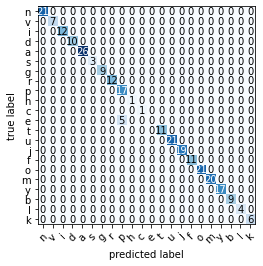

In [33]:
matrix = confusion_matrix(y_test,y_pred)
TEST_LABELS = "NvidiasgraphicschipsarentusedjustforgamesanymoreSincethecompanymadeitschipsprogrammabletheyaretakingonfunctionsthatIntelmicroprocessorsdoAndmorethanevertheyarebeingusedforBigDatanumbercrunchingandsolvingproblemsthatpreviouslyhadtobedonebynongraphicssupercomputers".lower()
unique_letters = []
for letter in TEST_LABELS:
    if letter not in unique_letters:
        unique_letters.append(letter)
print(len(unique_letters))
plot_confusion_matrix(conf_mat=matrix, class_names = unique_letters)